## Dataset
- We shall use [this](https://drive.google.com/file/d/19HJUwNbaf9DX8BBEA3DrrrWyJqTry4oq/view?usp=sharing) data for segmenting the customers at mall.
- Download the dataset and upload it to your `MyDrive`
- Mount your drive to access the file.

## Idea
- Assume that huge company like Myntra has this data
- Based on your analysis, they want to target customers who can purchase their expensive items
- Main aim is to identify, which type of customers they need to send sms
- This is to reduce overall budget for marketing as it will cut down due to removal of certain types of customers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
16,17,Female,35,21,35
135,136,Female,29,73,88
23,24,Male,31,25,73
79,80,Female,49,54,42
198,199,Male,32,137,18
67,68,Female,68,48,48
186,187,Female,54,101,24
22,23,Female,46,25,5
35,36,Female,21,33,81
142,143,Female,28,76,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data = df.iloc[:,3:]

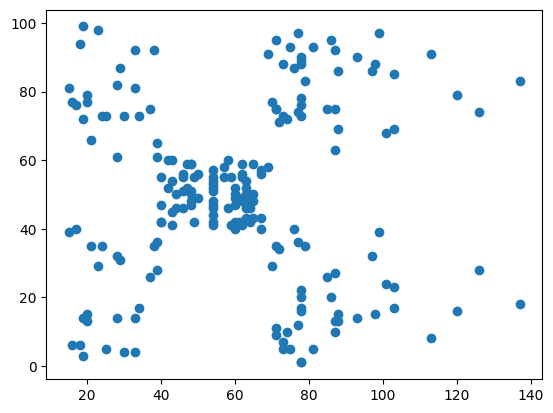

In [6]:
plt.scatter(data.iloc[:,0].values, data.iloc[:,1].values)
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [8]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

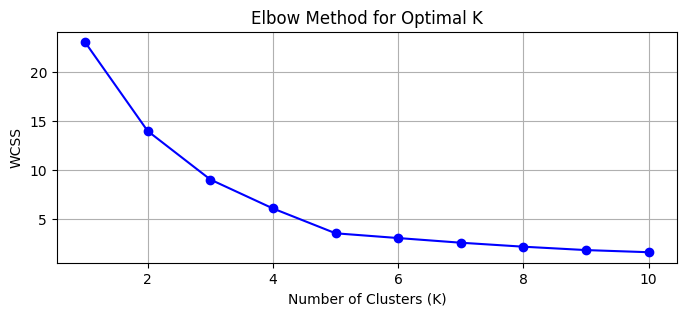

In [9]:
# Plot the WCSS values against the number of clusters (K)
plt.figure(figsize=(8, 3))
plt.plot(range(1,11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

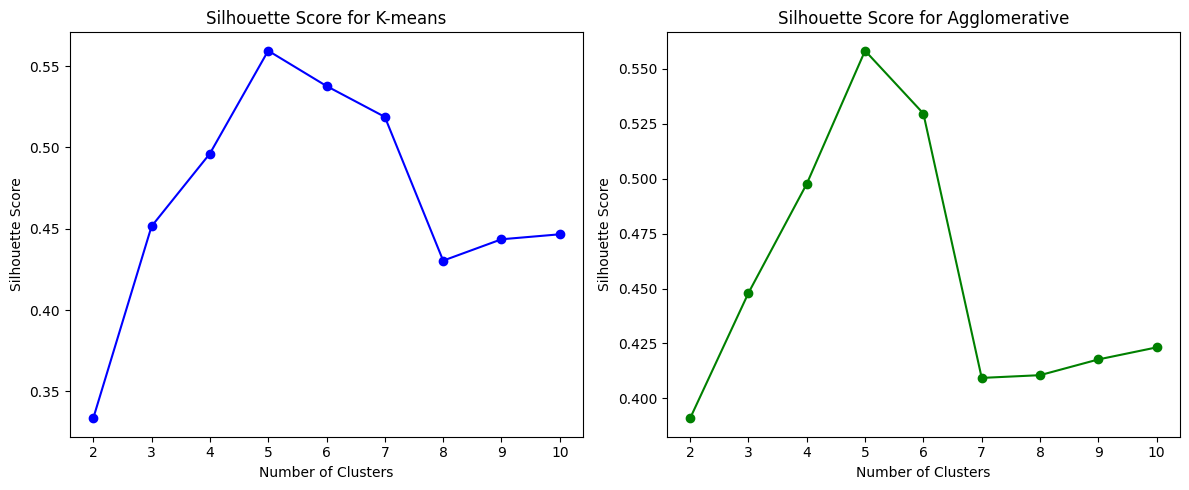

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Range of cluster numbers to test
cluster_range = range(2, 11)

# Lists to store Silhouette Scores
silhouette_scores_kmeans = []
silhouette_scores_agg = []

# Calculate Silhouette Scores for different numbers of clusters
for n_clusters in cluster_range:
    # For K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
    kmeans_labels = kmeans.fit_predict(data)
    kmeans_score = silhouette_score(data, kmeans_labels)
    silhouette_scores_kmeans.append(kmeans_score)

    # For Agglomerative clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(data)
    agg_score = silhouette_score(data, agg_labels)
    silhouette_scores_agg.append(agg_score)

# Plot the Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores_kmeans, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for K-means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores_agg, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Agglomerative')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [14]:
labels_kmeans = kmeans.predict(data)

In [15]:
cluster_centers = kmeans.cluster_centers_

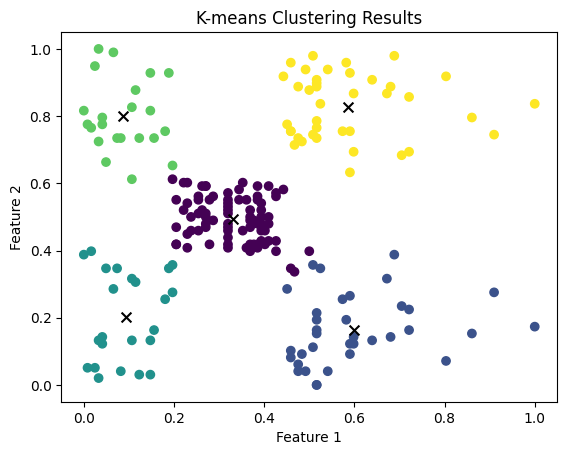

In [16]:
# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

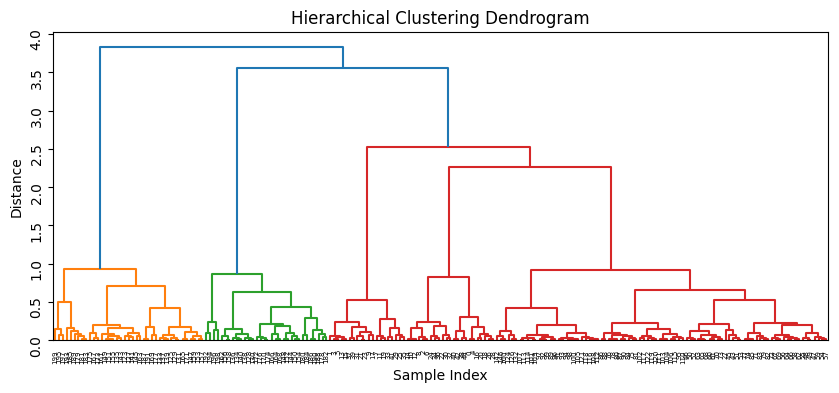

In [18]:
plt.figure(figsize=(10, 4))
dendrogram(linkage(data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.yticks(rotation=90)
plt.show()

In [19]:
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_agg = agg_clustering.fit_predict(data)

In [20]:
data = scaler.inverse_transform(data)

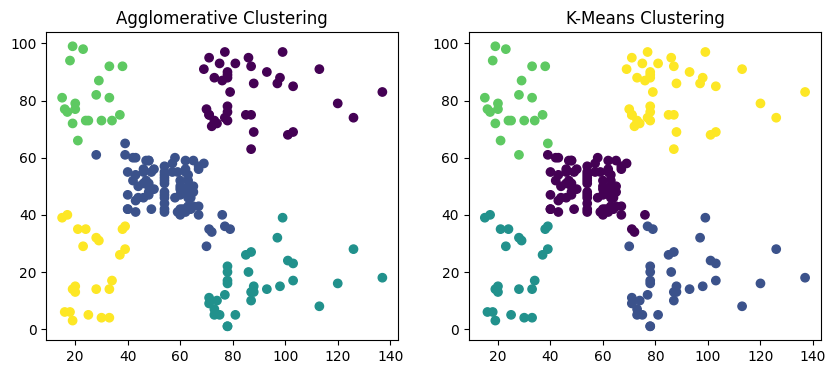

In [21]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_agg)
plt.title('Agglomerative Clustering')
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans)
plt.title('K-Means Clustering')
plt.show()

In [22]:
labels_kmeans, labels_agg

(array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
        2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
        2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
        0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
        1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
        1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
        1, 4], dtype=int32),
 array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
        4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1

In [23]:
for i in range(len(labels_agg)):
  if labels_agg[i] == 4:
    labels_agg[i] = 2
  elif labels_agg[i] == 1:
    labels_agg[i] = 0
  elif labels_agg[i] == 0:
    labels_agg[i] = 4
  elif labels_agg[i] == 2:
    labels_agg[i] = 1

In [24]:
# Get the unique values and their counts
unique_values, counts_kmeans = np.unique(labels_kmeans, return_counts=True)
_, counts_agg = np.unique(labels_agg, return_counts=True)

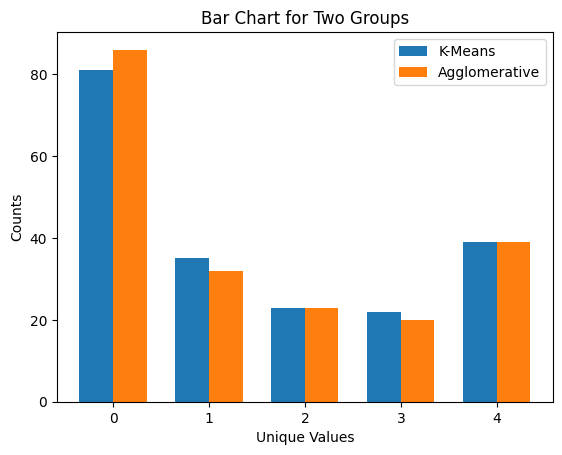

In [25]:
# Set the width of the bars
bar_width = 0.35

# Create an array for the x-axis positions
x = np.arange(len(counts_agg))

# Create a bar chart for Group 1
plt.bar(x - bar_width/2, counts_kmeans, bar_width, label='K-Means')

# Create a bar chart for Group 2 next to Group 1
plt.bar(x + bar_width/2, counts_agg, bar_width, label='Agglomerative')

# Set the x-axis labels to the unique values
plt.xticks(x, unique_values)

# Add labels and a legend
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Bar Chart for Two Groups')
plt.legend()

# Show the plot
plt.show()

In [26]:
kmeans_score = silhouette_score(data, labels_kmeans)
print(f"Silhouette Score for K-means: {kmeans_score}")

agg_score = silhouette_score(data, labels_agg)
print(f"Silhouette Score for Agglomerative: {agg_score}")

Silhouette Score for K-means: 0.553931997444648
Silhouette Score for Agglomerative: 0.5501569700737704


## Conclusions
- We have finally understood, which segments of customers to target for marketing sms.
